# Team Info

**IS4242 Project**

Driven Data Team Name: **Zup cai peng**

Team Members:

*   Chen Ri Sheng (A0182448X)
*   Phang Tze Ming (A0184247Y)




# Part 1: First Submission

## 1. Data Exploration

In this section, we are importing the training data to explore the various features in the provided csv files. 

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

x_train = pd.read_csv('x_train.csv')
# x_train
x_train.info()
x_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21703 entries, 0 to 21702
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     21703 non-null  int64  
 1   amount_tsh             21703 non-null  float64
 2   date_recorded          21703 non-null  object 
 3   funder                 20378 non-null  object 
 4   gps_height             21703 non-null  int64  
 5   installer              20370 non-null  object 
 6   longitude              21703 non-null  float64
 7   latitude               21703 non-null  float64
 8   wpt_name               21703 non-null  object 
 9   num_private            21703 non-null  int64  
 10  basin                  21702 non-null  object 
 11  subvillage             21569 non-null  object 
 12  region                 21702 non-null  object 
 13  region_code            21702 non-null  float64
 14  district_code          21702 non-null  float64
 15  lg

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11.0,5.0,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20.0,2.0,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21.0,4.0,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90.0,63.0,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18.0,1.0,Karagwe,Nyakasimbi,0.0,True,GeoData Consultants Ltd,NaN,NaN,True,0.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21698,60841,0.0,2012-10-18,World Vision,0,Consuting Engineer,33.013543,-4.196720,Igedeja,0,Internal,Igedeja,Tabora,14.0,1.0,Nzega,Itobo,0.0,True,GeoData Consultants Ltd,VWC,NaN,False,0.0,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
21699,13021,6000.0,2011-02-23,Twe,1907,TWE,34.727100,-9.650347,none,0,Lake Nyasa,Igomelo,Iringa,11.0,4.0,Njombe,Matola,30.0,True,GeoData Consultants Ltd,VWC,Mangil,True,2007.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
21700,5705,0.0,2011-07-21,Concern World Wide,0,DWE,31.509489,-2.762117,Msasani,0,Lake Tanganyika,Rwembuzi,Kagera,18.0,4.0,Biharamulo,Runazi,0.0,True,GeoData Consultants Ltd,VWC,NaN,True,0.0,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
21701,10628,0.0,2013-02-19,Government Of Tanzania,1295,DWE,35.847184,-4.287547,Kwa Juma Nziga,0,Internal,Chalo A,Manyara,21.0,1.0,Simanjiro,Loibor Siret,120.0,True,GeoData Consultants Ltd,Water Board,Gallapo water supply,True,2010.0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [ ]:
y_train = pd.read_csv('y_train.csv')
y_train

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In the next step, we are checking for the number of missing values in each feature.
We identified that ```scheme_name``` has too many null values. 

In [ ]:
for column in x_train.columns:
  print(f'name: {column} | null values: {x_train[column].isnull().sum()}')

name: id | null values: 0
name: amount_tsh | null values: 0
name: date_recorded | null values: 0
name: funder | null values: 1325
name: gps_height | null values: 0
name: installer | null values: 1333
name: longitude | null values: 0
name: latitude | null values: 0
name: wpt_name | null values: 0
name: num_private | null values: 0
name: basin | null values: 1
name: subvillage | null values: 134
name: region | null values: 1
name: region_code | null values: 1
name: district_code | null values: 1
name: lga | null values: 1
name: ward | null values: 1
name: population | null values: 1
name: public_meeting | null values: 1253
name: recorded_by | null values: 1
name: scheme_management | null values: 1451
name: scheme_name | null values: 10367
name: permit | null values: 1120
name: construction_year | null values: 1
name: extraction_type | null values: 1
name: extraction_type_group | null values: 1
name: extraction_type_class | null values: 1
name: management | null values: 1
name: management

In the next step, we are exploring the unique values for each feature to identify binary features.  
Here we noticed ```public_meeting``` and ```permit``` have only True/False values, while missing values are NaN. 

In [ ]:
for column in x_train.columns:
  print(f'{column}\'s unique values:\n {x_train[column].unique()} \n')

id's unique values:
 [69572  8776 34310 ...  5705 10628 16697] 

amount_tsh's unique values:
 [6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04] 

date_recorded's unique values:
 ['2011-03-14' '2013-03-06' '2013-02-25' '2013-01-28' '2011-07-13'
 '2011-03-13' '2012-10-01' '2012-10-09' '2012-11-03' '20

In this step, we are checking each feature for duplicates to remove the features that have high numbers of duplicates. 

We noticed that ```recorded_by``` only contains a single value, therefore we will drop this feature as well.

In [ ]:
# checking for duplicates
for column in x_train.columns:
  duplicates = x_train.pivot_table(index=[column], aggfunc='size')
  print(duplicates)
  print('\n')

id
0        1
1        1
2        1
3        1
4        1
        ..
74230    1
74236    1
74240    1
74242    1
74246    1
Length: 21703, dtype: int64


amount_tsh
0.0         15199
0.2             3
1.0             2
2.0             4
5.0           126
            ...  
100000.0        2
117000.0        2
120000.0        1
138000.0        1
350000.0        1
Length: 82, dtype: int64


date_recorded
2002-10-14     1
2004-04-05     1
2004-05-01     1
2004-06-01     1
2004-08-01     2
              ..
2013-10-03    54
2013-11-02    11
2013-11-03    75
2013-12-02    15
2013-12-03    86
Length: 327, dtype: int64


funder
0                     305
A/co Germany           10
Aar                    10
Abasia                 15
Abd                     4
                     ... 
Wwf                     8
Yasini Selemani         1
Zaben                   2
Zaburi And Neig         1
Zao Water Spring X      1
Length: 1177, dtype: int64


gps_height
-63      1
-59      1
-54      1
-51      1
-49 

In the next step, we are joining the x_train and y_train data on their IDs into one table to ensure that the order of training data is correct. 

From the previous cell, we notice that ```scheme_name``` has a very high number of null values which may render imputation useless. Hence, we will drop this feature. 

Here we also convert the ordinal feature ```date_recorded``` from String to Timestamps for imputation later.

In [ ]:
# left join the dataframes
train = pd.merge(x_train, y_train, left_on='id', right_on='id', how='left')

# split into y_train and x_train
y_train = train[['status_group']]
x_train = train.drop(['status_group', 'id', 'scheme_name', 'recorded_by'], axis=1) # drop scheme_name and recorded_by

# since date is a String, we want to represent date as a timestamp 
x_train.date_recorded = x_train.date_recorded.apply(lambda x: pd.to_datetime(x, errors='coerce').timestamp())
x_train

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,1.300061e+09,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11.0,5.0,Ludewa,Mundindi,109.0,True,VWC,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,1.362528e+09,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20.0,2.0,Serengeti,Natta,280.0,NaN,Other,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,1.361750e+09,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21.0,4.0,Simanjiro,Ngorika,250.0,True,VWC,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,1.359331e+09,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90.0,63.0,Nanyumbu,Nanyumbu,58.0,True,VWC,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,1.310515e+09,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18.0,1.0,Karagwe,Nyakasimbi,0.0,True,NaN,True,0.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21698,0.0,1.350518e+09,World Vision,0,Consuting Engineer,33.013543,-4.196720,Igedeja,0,Internal,Igedeja,Tabora,14.0,1.0,Nzega,Itobo,0.0,True,VWC,False,0.0,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
21699,6000.0,1.298419e+09,Twe,1907,TWE,34.727100,-9.650347,none,0,Lake Nyasa,Igomelo,Iringa,11.0,4.0,Njombe,Matola,30.0,True,VWC,True,2007.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
21700,0.0,1.311206e+09,Concern World Wide,0,DWE,31.509489,-2.762117,Msasani,0,Lake Tanganyika,Rwembuzi,Kagera,18.0,4.0,Biharamulo,Runazi,0.0,True,VWC,True,0.0,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
21701,0.0,1.361232e+09,Government Of Tanzania,1295,DWE,35.847184,-4.287547,Kwa Juma Nziga,0,Internal,Chalo A,Manyara,21.0,1.0,Simanjiro,Loibor Siret,120.0,True,Water Board,True,2010.0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


## 2. Preprocessing & Features Engineering

In this step, we are trying to find out which of the features are numerical / categorical / binary / ordinal. 

From the dataframe above, we know that ```public_meeting``` and ```permit``` are binary  features, and ```date_recorded```, ```gps_height``` and ```construction year``` are ordinal features.

After which, we seperate the remaining features further into numerical and categorial features.  

In [ ]:
# seperate the features into numerical, binary, ordinal and categorical
bin_features = ['public_meeting', 'permit']
ord_features = ['date_recorded', 'gps_height', 'construction_year']
num_features = x_train.drop(bin_features, axis=1).drop(ord_features, axis=1)._get_numeric_data().columns.values.tolist()
cat_features = x_train.drop(num_features, axis=1).drop(bin_features, axis=1).drop(ord_features, axis=1).columns.values.tolist()
# cat_features
# num_features

In our previous attempts, when we tried to perform imputation and one hot encoding on all the features, the resulting matrix (59400, 66178) was too large to perform PCA to reduce the dimensionality. 

Therefore, in the next step, we will use **SelectKBest** to reduce number of categorical features to be used to train our model. 

Here we create a categorical feature transformer that imputes missing values with the most_frequent strategy, followed by onehot encoding and finally SelectKBest with `score_func=chi2` and `k=100`.

Next, we build a ColumnTransformer to combine the instances of transformers and imputers.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# define the imputers and respective strategies
ord_imp = SimpleImputer(missing_values=np.nan, strategy='median')
num_imp = SimpleImputer(missing_values=np.nan, strategy='median')
bin_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

oh_enc = OneHotEncoder(sparse='false', handle_unknown='ignore')
selectkbest = SelectKBest(chi2, k=100)

cat_transformer = Pipeline(steps=[('imputer', cat_imp), 
                                  ('onehot', oh_enc),
                                  ('kbest', selectkbest)])

imp_oh_transformer = ColumnTransformer(transformers=[('num', num_imp, num_features), 
                                                     ('bin', bin_imp, bin_features),
                                                     ('ord', ord_imp, ord_features),
                                                     ('cat', cat_transformer, cat_features)])

x_train_imp_f = imp_oh_transformer.fit_transform(x_train, y_train)
x_train_imp_f

<21703x112 sparse matrix of type '<class 'numpy.float64'>'
	with 473617 stored elements in Compressed Sparse Row format>

In the next step, we are trying to normalize the features after imputation and encoding using the `StandardScaler`. As imputation and encoding results in a sparse matrix, we have to use `with_mean=False` because centering a sparse matrix would use too much memory. 

Previously we tried to use PCA to reduce the dimensions but PCA does not support sparse matrices. Therefore we decided to use TruncatedSVD instead, with `n_components=100`. 

After which, we plot an explained variance ratio graph to find the initial optimal number of components. According to the graph, with 60 components, we can explain more than 90% of the variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

Text(0, 0.5, 'cumulative explained variance')

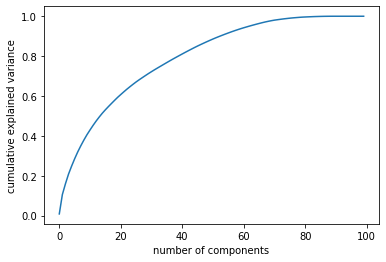

In [ ]:
scaled_x_train = StandardScaler(with_mean=False).fit_transform(x_train_imp_f)
scaled_x_train

t_svd = TruncatedSVD(n_components=100)
t_svd.fit(scaled_x_train, y_train)
plt.plot(np.cumsum(t_svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
x_train_reduced = TruncatedSVD(n_components=60).fit_transform(scaled_x_train, y_train)
x_train_reduced

array([[ 4.59779650e+01, -4.24245235e+00, -1.65412453e+00, ...,
         1.71524062e-01,  5.32135460e-02, -2.92526756e-01],
       [ 4.77693480e+01, -2.04351787e+00, -3.33757962e-01, ...,
        -2.70533081e-01,  2.03384074e-01,  4.97719333e-01],
       [ 4.79846213e+01, -2.08047121e+00,  7.42704868e-01, ...,
         6.73967016e-02, -5.72835418e-03,  1.89120859e-01],
       ...,
       [ 4.59785205e+01,  3.95222575e+00,  3.04054439e+00, ...,
         1.99148814e-02,  5.54231015e-02,  7.53340761e-02],
       [ 4.79685143e+01, -3.18000677e+00, -2.33441396e-01, ...,
        -2.35147565e-01,  5.11840558e-01,  1.00145504e-02],
       [ 4.62849026e+01, -1.22159103e+00, -1.56465341e+00, ...,
         6.52989614e-01, -4.07474991e-02,  6.81856586e-01]])

## 3. Model Building

In the next step, we are building a pipeline that includes all the steps above to preprocess X values. We then used the pipeline to transform x_test for prediction as well. 

As we used Timestamps instead of date strings for `date_recorded`, we have to convert for x_test as well. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_test = pd.read_csv('x_test.csv')
x_test.date_recorded = x_test.date_recorded.apply(lambda x: pd.to_datetime(x, errors='coerce').timestamp()) # convert to Timestamp

preprocess_x = Pipeline(steps=[('impute_encode', imp_oh_transformer),
                               ('scaler', StandardScaler(with_mean=False)),
                               ('dim_red', TruncatedSVD(n_components=60))])

x_train_processed = preprocess_x.fit_transform(x_train, y_train)
x_test_processed = preprocess_x.transform(x_test)
x_test.shape

(14850, 40)

Here we fit a K Nearest Neighbors model with `n_neighbors=7` as our initial value. Then we used the model to predict `y_pred` using the `x_test_processed`.

In [ ]:
M = KNeighborsClassifier(n_neighbors=7).fit(x_train_processed, y_train)

status_group = M.predict(x_test_processed)
result = pd.DataFrame({'id': x_test.id, 'status_group': status_group}).set_index('id')
result.to_csv('y_pred.csv')

## 4. First Submission results
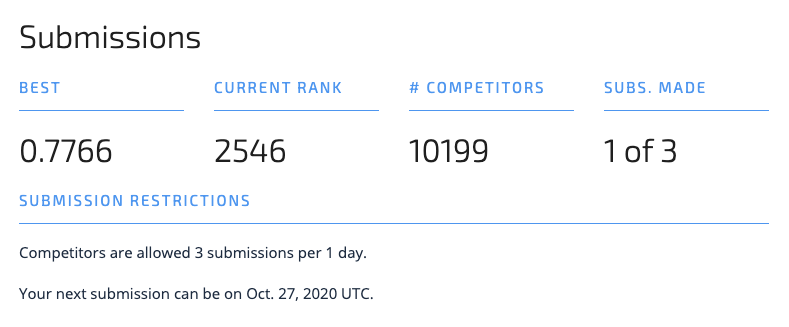

## 5. First Submission Improvements

In our first submission, we assumed the following initial parameters:

| Step Taken        | Parameter    | Initial Value | Possible Alternative Values |
|-------------------|--------------|-------|-----------------------|
| SelectKBest       | score_func   | chi2  | chi2, f_classif       |
| SelectKBest       | k            | 100   | 100, 1000, 10000      |
| TruncatedSVD      | n_components | 60    | 50, 60, 80            |
| KNearestNeighbors | n_neighbors  | 7     | 7, 21, 49             |

Next, we would like to use GridSeachCV to tune our hyperparameters to improve our model accuracy. We started out with the parameters to get a sense of where we should begin. 

Here we built a pipeline and then performed 5-fold GridSearchCV with approximately 25% of the training data to minimize running time without compromising results.

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
final = Pipeline(steps=[('preprocess', preprocess_x),
                        ('knn', KNeighborsClassifier())])

hyperparameters = {
    'preprocess__impute_encode__cat__kbest__k': [100, 1000, 10000],
    'preprocess__dim_red__n_components': [50, 60, 80],
    'knn__n_neighbors': [7, 21, 49],
}

est1 = GridSearchCV(final, hyperparameters, cv=5)
# for key in est1.get_params().keys():
#   print(key + '\n')
est1.fit(x_train[:15000], y_train[:15000])

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        Pipeline(memory=None,
                                                 steps=[('impute_encode',
                                                         ColumnTransformer(n_jobs=None,
                                                                           remainder='drop',
                                                                           sparse_threshold=0.3,
                                                                           transformer_weights=None,
                                                                           transformers=[('num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [ ]:
est1.best_params_

{'knn__n_neighbors': 7,
 'preprocess__dim_red__n_components': 60,
 'preprocess__impute_encode__cat__kbest__k': 100}

In the next few steps, we tried to tune our hyperparameters on a narrower range as we were curious how far we could go with tuning. 

We also explored using `f_classif` score function in SelectKBest as compared to using chi square. We quickly realized that chi square resulted in more accurate results and so we stuck with it subsequently.

In [ ]:
cat_transformer2 = Pipeline(steps=[('imputer', cat_imp), 
                                  ('onehot', oh_enc),
                                  ('kbest', SelectKBest(f_classif))])

imp_oh_transformer2 = ColumnTransformer(transformers=[('num', num_imp, num_features), 
                                                     ('bin', bin_imp, bin_features),
                                                     ('ord', ord_imp, ord_features),
                                                     ('cat', cat_transformer2, cat_features)])

preprocess_x2 = Pipeline(steps=[('impute_encode', imp_oh_transformer2),
                               ('scaler', StandardScaler(with_mean=False)),
                               ('dim_red', TruncatedSVD())])

final2 = Pipeline(steps=[('preprocess', preprocess_x2),
                        ('knn', KNeighborsClassifier())])


hyperparameters = {
    'preprocess__impute_encode__cat__kbest__k': [100, 1000, 10000],
    'preprocess__dim_red__n_components': [50, 60, 80],
    'knn__n_neighbors': [7, 21, 49],
}

est2 = GridSearchCV(final2, hyperparameters, cv=5)
est2.fit(x_train[:10000], y_train[:10000])

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        Pipeline(memory=None,
                                                 steps=[('impute_encode',
                                                         ColumnTransformer(n_jobs=None,
                                                                           remainder='drop',
                                                                           sparse_threshold=0.3,
                                                                           transformer_weights=None,
                                                                           transformers=[('num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [ ]:
est2.best_params_

{'knn__n_neighbors': 7,
 'preprocess__dim_red__n_components': 80,
 'preprocess__impute_encode__cat__kbest__k': 100}

In [ ]:
hyperparameters = {
    'preprocess__impute_encode__cat__kbest__k': [95, 100, 105],
    'preprocess__dim_red__n_components': [75, 80, 85],
    'knn__n_neighbors': [3, 5, 7, 9],
}

est3 = GridSearchCV(final, hyperparameters, cv=5)
est3.fit(x_train[:10000], y_train[:10000])

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        Pipeline(memory=None,
                                                 steps=[('impute_encode',
                                                         ColumnTransformer(n_jobs=None,
                                                                           remainder='drop',
                                                                           sparse_threshold=0.3,
                                                                           transformer_weights=None,
                                                                           transformers=[('num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [ ]:
est3.best_params_

{'knn__n_neighbors': 9,
 'preprocess__dim_red__n_components': 80,
 'preprocess__impute_encode__cat__kbest__k': 95}

With the results above, we arrived at these final values for our parameters:

| Step Taken        | Parameter    | Final Value |
|-------------------|--------------|-------|
| SelectKBest       | score_func   | chi2  | 
| SelectKBest       | k            | 95   |
| TruncatedSVD      | n_components | 80    |
| KNearestNeighbors | n_neighbors  | 9     |

We then created a pipeline and fitted the training dataset. 

In [ ]:
cat_transformer5 = Pipeline(steps=[('imputer', cat_imp), 
                                  ('onehot', oh_enc),
                                  ('kbest', SelectKBest(chi2, k=95))])

imp_oh_transformer5 = ColumnTransformer(transformers=[('num', num_imp, num_features), 
                                                     ('bin', bin_imp, bin_features),
                                                     ('ord', ord_imp, ord_features),
                                                     ('cat', cat_transformer5, cat_features)])

preprocess_x5 = Pipeline(steps=[('impute_encode', imp_oh_transformer5),
                               ('scaler', StandardScaler(with_mean=False)),
                               ('dim_red', TruncatedSVD(n_components=80))])

final5 = Pipeline(steps=[('preprocess', preprocess_x5),
                        ('knn', KNeighborsClassifier(n_neighbors=9))])

In [ ]:
final5.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 Pipeline(memory=None,
                          steps=[('impute_encode',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('num',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
   

In [ ]:
status_group = final5.predict(x_test)
result = pd.DataFrame({'id': x_test.id, 'status_group': status_group}).set_index('id')
result.to_csv('y_pred_best.csv')

Using the model trained, we used it to predict our y values and our score on datadriven improved.

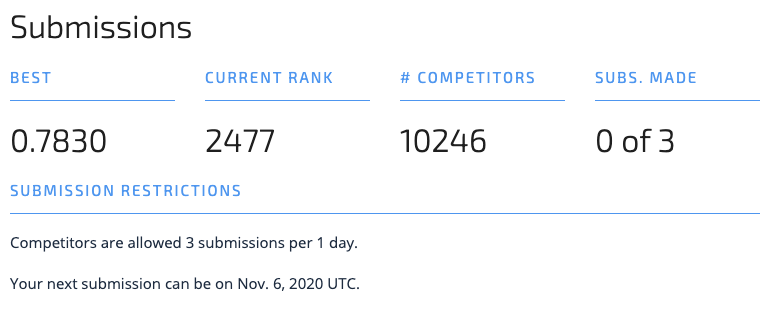

# Part 1: Second Submission

For our Neural Network submission, we will use the PyTorch library.

We started by converting our numpy arrays to pytorch tensors. We used the scaled and processed data from our first submission as a starting point. As NNs can only take in numerical values, we used the LabelEncoder to encode out y_train values. 

In [ ]:
import torch
from torch.utils.data import DataLoader

In [ ]:
#from_numpy takes a numpy element and returns torch.tensor

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# x_train_processed = preprocess_x5.fit_transform(x_train, y_train)
x_train_tensor = torch.from_numpy(x_train_processed).type(torch.FloatTensor)
y_train = y_train[['status_group']]
# we have to label encodes the y labels into numbers before converting to tensor
y_train_enc = le.fit_transform(y_train)
y_train_tensor = torch.from_numpy(y_train_enc).type(torch.LongTensor)
# type(x_train_processed)
print(x_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([59400, 60])
torch.Size([59400])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

Here, we will be creating a class that holds our Linear layers, our method for the forward step as well as the method to call when predicting results.

Inside `forward()`, we use `tanh` activation function in the hidden layer because we want to bring non-linearity into the network, so that it is possible know which weights are to be assigned to the input neurons for better predictions. In addtion, `tanh` is differentiable and exists between -1 and 1.

Inside `predict()`, we are applying the `softmax` activation because `softmax` activation distributes the probability throughout each output node. In our case, our classification task is multi-class. Hence, using `softmax` is more suitable in our case. After applying `softmax`, we would then pick the one with the maximum weight and since we have 3 classes, we will get the maxmium of the 3 to correctly assign the predicted label.

In [ ]:
class MyNN(nn.Module):
  def __init__(self):
    super(MyNN,self).__init__()
    #Our network consists of 4 layers. 1 input, 2 hidden and 1 output layer
    #This applies Linear transformation to input data. 
    self.fc1 = nn.Linear(60, 10)
    self.fc2 = nn.Linear(10, 3)
      
  #This must be implemented
  def forward(self,x):
    x = F.tanh(self.fc1(x))
    x = self.fc2(x)
    # x = F.softmax(x)
    return x
      
  # #This function takes an input and predicts the class, (functional, functional needs repair and non functional)        
  def predict(self,x):
    #Apply softmax to output because we have 3 classes (functional, functional needs repair and non functional). 
    pred = F.softmax(self.forward(x))
    ans = []
    #Pick the class with maximum weight
    for t in pred:
        if t[0]>t[1] and t[0]>t[2]:
          ans.append(0)
        elif t[1]>t[2]:
          ans.append(1)
        else:
          ans.append(2)
    return torch.tensor(ans)

Since our task is a multi-class classification task ( 3 different labels), we would use Cross Entropy Loss as our loss function. This loss function helps to caculate the difference between the real values and the predicted values.

In [ ]:
#Initialize the model        
model = MyNN()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

We then feed our NN with the x_train and y_train data, to allow the model to compute the loss from the truth and the predicted values. After computation of the loss, the model will then update the gradient values by calling `backward()`. We have to call `zero_grad()` before `backward` so as to not let our gradients accumulate from the running passes. Finally, the optimizer will call `step()` to update the weight values based on the gradient before going to the next loop.

In [ ]:
#Number of epochs
epochs = 2
#List to store losses
losses = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(x_train_tensor)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y_train_tensor)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()

After we have trained our NN, we can now use `x_test` data to predict values. We will also scale and preprocess `x_test` before converting it to a pytorch tensor. We will then use it to feed it to our NN

In [ ]:
#Predict and return ans
# new_x_test_processed = preprocess_x5.transform(x_test)
x_test_tensor = torch.from_numpy(x_test_processed).type(torch.FloatTensor)
ans = model.predict(x_test_tensor)
ans

tensor([0, 0, 0,  ..., 0, 0, 0])

We will then convert our predicted values back to numpy arrays, and then make use of LabelEncoder to switch the encoded values back to its original label values, which in our case are `functional`, `non functional`, `functional needs repair`.

In [ ]:
# conver tensor back to numpy array
arr = ans.numpy()
arr

arr = le.inverse_transform(arr)
result = pd.DataFrame({'id': x_test.id, 'status_group': arr}).set_index('id')
result.to_csv('y_pred_nn.csv')

We got a score of 0.7263

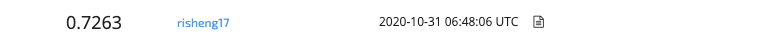

We will now be using Ax to automate the tuning of the hyperparameters

In [ ]:
!pip install ax-platform
from ax import optimize
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

     |████████████████████████████████| 501kB 2.7MB/s 
     |████████████████████████████████| 225kB 8.6MB/s 
     |████████████████████████████████| 296kB 11.7MB/s 
  Created wheel for gpytorch: filename=gpytorch-1.2.1-py2.py3-none-any.whl size=463973 sha256=a45eabc237926ec620b4bfaf0f664551a44054d9d0ab314bcae7a9bef9c52a1b
  Stored in directory: /root/.cache/pip/wheels/2e/d5/dc/0a984c2acc9b35f9860f543c10732442c2cd5719d923236017
Successfully built gpytorch


Here, we have decided to use TensorDataset as both `x_train` and `y_train` can be combined into a single dataset, which makes it easier to iterate over. We then split the entire dataset into the training set and the testing (validation) set.

We make use of Dataloader here as it makes it easier to iterate the data through batches.

In [ ]:
# print(x_train_tensor.size(0))
# print(y_train_tensor.size(0))
dataset = TensorDataset(x_train_tensor, y_train_tensor)

trainset, testset = random_split(dataset, [40000, 19400]) # split into training and testing set

trainloader = DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=100, shuffle=True, num_workers=2)

Since we are using Ax to help us automate the process of hyperparameter tuning and it only takes in an evaluation function to determine the best hyperparameters, we will need to come up with the function to optimize.


In our function, we take in a set of parameter values, train and return the accuracy rates of the selected parameters used in each round.

In [ ]:
## helper train/fit function
def train(model, parameterization, trainloader):
  optimizer = torch.optim.SGD(model.parameters(), lr=parameterization["lr"], momentum=parameterization["momentum"])
  criterion = nn.CrossEntropyLoss()
  
  #Number of epochs
  epochs = 10
  #List to store losses
  losses = []
  for i in range(epochs):
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data # extracting x_train and y_train from batch

      optimizer.zero_grad() # reset the gradient for optimizer

      #Predict the output for Given input
      y_pred = model.forward(inputs)
      #Compute Cross entropy loss
      loss = criterion(y_pred,labels)
      #Add loss to the list
      losses.append(loss.item())
      #Compute gradients
      loss.backward()
      #Adjust weights
      optimizer.step()

      # end for
    # end for

  return model

            
## helper function to evaluate the accuracy for the tested model
def evaluate(model, testloader):
  correct = 0
  total = 0
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))
  return 100 * correct / total
  
  # correct = 0
  # total = 0
  # with torch.no_grad():
  #     for data in testloader:
  #         input, labels = data
  #         predicted = model.predict(input)
  #         total += labels.size(0) # get total length of tensor
          
  #         correct = torch.sum(torch.eq(predicted, labels)).item()
  #         # # getting number of correct predictions
  #         # for i, label in enumerate(labels): 
  #         #   if label.data[0] == predicted[i].data[0]: correct += 1

  # print('Accuracy of the network on the 19400 test data: %d %%' % (
  #     100 * correct / total))
  # return 100 * correct / total

## helper function train-evaluate to pass as the function to be optimized
def train_evaluate(parameterization):
    model = MyNN()
    model = train(model, parameterization, trainloader)
    return evaluate(model, testloader)
    

Here is where we set the bounds on the learning rate and momentum and set the parameter space for the learning rate to be on a log scale. We consider the learning rate to be on log scale as we do not want high values of learning rates. High values of learning rate can cause gradient descent to increase, which in turn does not help in reducing the training error.

We then run the Ax's `optimize` loop for 10 trials.

In [ ]:
best_parameters, values, experiment, model = optimize(
    parameters=[
        {"name": "lr", "type": "range", "bounds": [1e-6, 0.4], "log_scale": True},
        {"name": "momentum", "type": "range", "bounds": [0.0, 1.0]},
    ],
    evaluation_function=train_evaluate,
    objective_name='accuracy',
    total_trials=10
)

[INFO 10-31 09:19:51] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 arms, GPEI for subsequent arms], generated 0 arm(s) so far). Iterations after 5 will take longer to generate due to model-fitting.
[INFO 10-31 09:19:51] ax.service.managed_loop: Started full optimization with 10 steps.
[INFO 10-31 09:19:51] ax.service.managed_loop: Running optimization trial 1...
[INFO 10-31 09:20:03] ax.service.managed_loop: Running optimization trial 2...


Accuracy of the network on the 10000 test images: 72 %


[INFO 10-31 09:20:15] ax.service.managed_loop: Running optimization trial 3...


Accuracy of the network on the 10000 test images: 54 %


[INFO 10-31 09:20:27] ax.service.managed_loop: Running optimization trial 4...


Accuracy of the network on the 10000 test images: 37 %


[INFO 10-31 09:20:39] ax.service.managed_loop: Running optimization trial 5...


Accuracy of the network on the 10000 test images: 54 %


[INFO 10-31 09:20:51] ax.service.managed_loop: Running optimization trial 6...


Accuracy of the network on the 10000 test images: 71 %


[INFO 10-31 09:21:03] ax.service.managed_loop: Running optimization trial 7...


Accuracy of the network on the 10000 test images: 71 %


[INFO 10-31 09:21:15] ax.service.managed_loop: Running optimization trial 8...


Accuracy of the network on the 10000 test images: 72 %


[INFO 10-31 09:21:27] ax.service.managed_loop: Running optimization trial 9...


Accuracy of the network on the 10000 test images: 61 %


[INFO 10-31 09:21:41] ax.service.managed_loop: Running optimization trial 10...


Accuracy of the network on the 10000 test images: 72 %
Accuracy of the network on the 10000 test images: 54 %


Thes are the best parameters that we have gotten:

`learning rate`: 0.027720634003997564,
`momentum`: 0.21422918643325364

In [ ]:
# these are the best parameters that we have gotten from the automated hyperparameter tuning
best_parameters

{'lr': 0.027720634003997564, 'momentum': 0.21422918643325364}

We refactored our NN class here without the `predict()` this time. We placed the `softmax` as the last step in `forward()` before calling `convert_pred()` to get the maxmium weight to assign the predicted label.

In [ ]:
class MyNN(nn.Module):
  def __init__(self):
    super(MyNN,self).__init__()
    #Our network consists of 4 layers. 1 input, 2 hidden and 1 output layer
    #This applies Linear transformation to input data. 
    self.fc1 = nn.Linear(60, 10)
    self.fc2 = nn.Linear(10, 3)
      
  #This must be implemented
  def forward(self,x):
    x = F.tanh(self.fc1(x))
    x = self.fc2(x)
    x = F.softmax(x)
    return x

In [ ]:
def convert_pred(pred):
  ans = []
  #Pick the class with maximum weight
  for t in pred:
      if t[0]>t[1] and t[0]>t[2]:
        ans.append(0)
      elif t[1]>t[2]:
        ans.append(1)
      else:
        ans.append(2)
  return ans

We then make use of the best parameters that we have gotten from the automated hyperparamter tuning to train our NN.

Similarly, We will then convert our predicted values back to numpy arrays.

In [ ]:
#Initialize the model        
model = MyNN()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.027720634003997564, momentum=0.21422918643325364)

#Number of epochs
epochs = 1000
#List to store losses
losses = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(x_train_tensor)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y_train_tensor)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()

#Predict and return ans
x_test_tensor = torch.from_numpy(x_test_processed).type(torch.FloatTensor)
ans = np.asarray(convert_pred(model(x_test_tensor)))
ans

array([2, 0, 2, ..., 0, 0, 2])

We then make use of LabelEncoder to switch the encoded values back to its original label values, which in our case are `functional`, `non functional`, `functional needs repair`.

In [ ]:
status_group_nnpred = le.inverse_transform(ans)
result = pd.DataFrame({'id': x_test.id, 'status_group': status_group_nnpred}).set_index('id')
result.to_csv('y_pred.csv')

We obtained a score of 0.7244 from the usage of Neural Network and automated hyperparameter tuning 
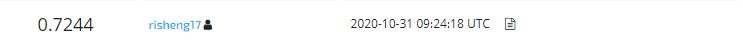